In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**object**

predicting rider retention. 
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the syste

In [2]:
df = pd.read_json("dataset/ultimate_challenge/ultimate_data_challenge.json")

In [3]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


This dataset is containing some null data

In [5]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [6]:
# create target value 
active_user = []

# active(1) if last trip is withthin 30 days otherwise 0
border_of_active = df["signup_date"].apply(lambda x: pd.Timestamp(x)) + pd.offsets.Day(181) - pd.offsets.Day(30)

last_trip = df["last_trip_date"].apply(lambda x: pd.Timestamp(x))
active_user = border_of_active <= last_trip

In [7]:
df["active_user"] = active_user.astype(int)

In [8]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


**check corralation each features**

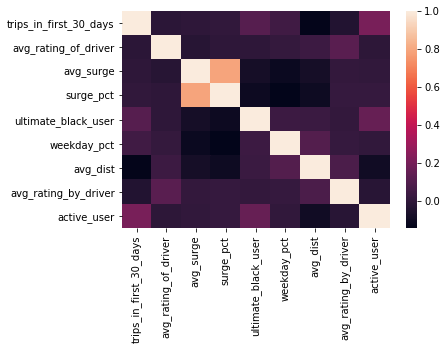

In [9]:
plt.figure()
corr = df.corr()
sns.heatmap(corr)
plt.show()

ultimate_black_user, trips_in_30_days and target value have a better corralation more than others

In [10]:
corr["active_user"].sort_values(ascending=False)

active_user               1.000000
trips_in_first_30_days    0.204841
ultimate_black_user       0.159157
surge_pct                 0.017045
avg_surge                 0.006267
weekday_pct               0.005518
avg_rating_of_driver     -0.008835
avg_rating_by_driver     -0.022339
avg_dist                 -0.091802
Name: active_user, dtype: float64

 **categorical value**
 
 The dataset contains some categorical values we will check categorical value

・ city

・phone

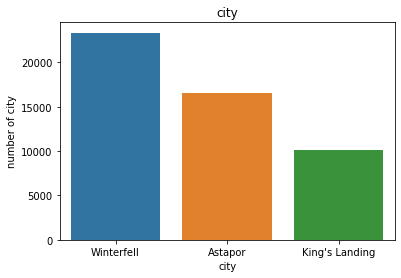

In [11]:
city_count = df.city.value_counts()
sns.barplot(city_count.index, city_count.values)
plt.title("city")
plt.ylabel("number of city")
plt.xlabel("city")
plt.show()

In [12]:
# city in not including null
df.city.isnull().sum()

0

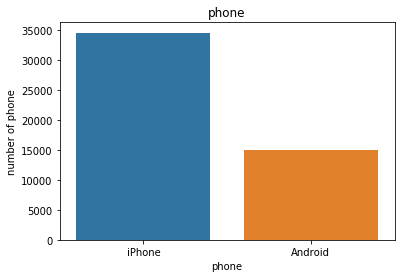

In [13]:
phone_count = df.phone.value_counts()
sns.barplot(phone_count.index, phone_count.values)
plt.title("phone")
plt.ylabel("number of phone")
plt.xlabel("phone")
plt.show()

In [14]:
# phone colum has null data
df.phone.isnull().sum()

396

As you see phone column is including 396 null data, we will fill it

I will check how many people use iphone or android also check if use is active or not 

In [15]:
city_king_iphone_active = df.loc[(df["phone"] == "iPhone") & (df["city"] == "King's Landing") & (df["active_user"] == 1)].shape[0]
city_king_iphone_non_active = df.loc[(df["phone"] == "iPhone") & (df["city"] == "King's Landing")  & (df["active_user"] == 0)].shape[0]
city_king_android_active = df.loc[(df["phone"] == "Android") & (df["city"] == "King's Landing") & (df["active_user"] == 1)].shape[0]
city_king_android_non_active = df.loc[(df["phone"] == "Android") & (df["city"] == "King's Landing")  & (df["active_user"] == 0)].shape[0]

city_winter_iphone_active = df.loc[(df["phone"] == "iPhone") & (df["city"] == "Winterfell")  & (df["active_user"] == 1)].shape[0]
city_winter_iphone_non_active = df.loc[(df["phone"] == "iPhone") & (df["city"] == "Winterfell")  & (df["active_user"] == 0)].shape[0]
city_winter_android_active = df.loc[(df["phone"] == "Android") & (df["city"] == "Winterfell")  & (df["active_user"] == 1)].shape[0]
city_winter_android_non_active = df.loc[(df["phone"] == "Android") & (df["city"] == "Winterfell")  & (df["active_user"] == 0)].shape[0]

city_astapor_iphone_active = df.loc[(df["phone"] == "iPhone") & (df["city"] == "Astapor") & (df["active_user"] == 1)].shape[0]
city_astapor_iphone_non_active = df.loc[(df["phone"] == "iPhone") & (df["city"] == "Astapor") & (df["active_user"] == 0)].shape[0]
city_astapor_android_active = df.loc[(df["phone"] == "Android") & (df["city"] == "Astapor") & (df["active_user"] == 1)].shape[0]
city_astapor_android_non_active = df.loc[(df["phone"] == "Android") & (df["city"] == "Astapor") & (df["active_user"] == 0)].shape[0]

Text(0.5, 1.0, 'Astapor')

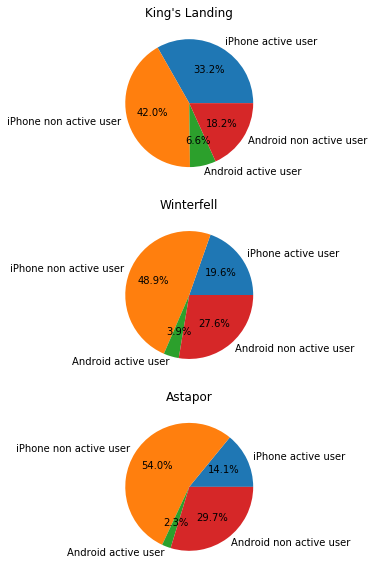

In [16]:
label = ["iPhone active user", "iPhone non active user", "Android active user", "Android non active user"]

plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
plt.pie([city_king_iphone_active / df.shape[0] * 100, city_king_iphone_non_active / df.shape[0] * 100,
        city_king_android_active / df.shape[0] * 100, city_king_android_non_active / df.shape[0] * 100], labels=label, autopct='%1.1f%%')
plt.title("King's Landing")


plt.subplot(3, 1, 2)
plt.pie([city_winter_iphone_active / df.shape[0] * 100, city_winter_iphone_non_active / df.shape[0] * 100,
        city_winter_android_active / df.shape[0] * 100, city_winter_android_non_active / df.shape[0] * 100], labels=label, autopct='%1.1f%%')
plt.title("Winterfell")

plt.subplot(3, 1, 3)
plt.pie([city_astapor_iphone_active / df.shape[0] * 100, city_astapor_iphone_non_active / df.shape[0] * 100,
        city_astapor_android_active / df.shape[0] * 100, city_astapor_android_non_active / df.shape[0] * 100], labels=label, autopct='%1.1f%%')
plt.title("Astapor")


surprisingly more than 50 % uses are using iphone also android uses who is active rate are not so high. I will use these data to fill null data

In [17]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [18]:
df["phone"].fillna("iPhone", inplace=True)

In [19]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                        0
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_user                  0
dtype: int64

In [20]:
# convert categorical to num
phone_col = pd.get_dummies(df["phone"])
city_col = pd.get_dummies(df["city"])

In [21]:
df = df.join(phone_col)
df = df.join(city_col)

In [22]:
# drop city and phone column
df.drop(["city","phone"], axis=1, inplace=True)

In [23]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,Android,iPhone,Astapor,King's Landing,Winterfell
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,0,0,1,0,1,0
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,1,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,0,1,1,0,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,0,1,0,1,0
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,1,0,0,0,1


Check corralation between target and new columns that  I converted as onehot

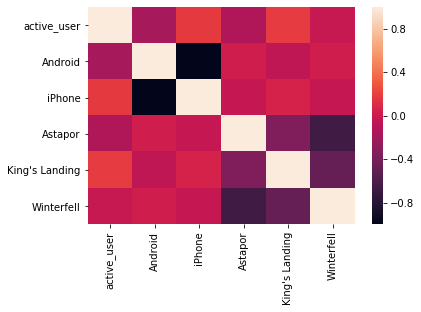

In [24]:
new_cor = df.loc[:, "active_user": "Winterfell"]
corr = new_cor.corr()
sns.heatmap(corr)
plt.show()


In [25]:
corr["active_user"].sort_values(ascending=False)

active_user       1.000000
King's Landing    0.180708
iPhone            0.176623
Winterfell       -0.020727
Astapor          -0.132408
Android          -0.176623
Name: active_user, dtype: float64

People who is living in  King's Landing is high collaration more than with target value than other city also iPhone use is higher corralation compared to android user.

We didn't check corralation between last_trip_date, signup_date and target value, but I cleate target value from last_trip_date so I will drop these columns for model performance

Actually there still null value in avg_rating_of_driver and avg_rating_by_driver columns. We will fill null before starting build a model.

In [26]:
# drop date data
df = df.drop(["last_trip_date", "signup_date"], axis=1)

In [27]:
df.avg_rating_of_driver.describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [28]:
df.avg_rating_by_driver.describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [29]:
# fill null
df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean(), inplace=True)
df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean(), inplace=True)

In [30]:
# no more null value
df.isnull().sum()

trips_in_first_30_days    0
avg_rating_of_driver      0
avg_surge                 0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
active_user               0
Android                   0
iPhone                    0
Astapor                   0
King's Landing            0
Winterfell                0
dtype: int64

In [31]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_user,Android,iPhone,Astapor,King's Landing,Winterfell
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,0,0,1,0,1,0
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,1,1,0,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,1,0
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,1,0,0,0,1


In [32]:
# ultimate_black_user is still not num we covert bool to num
df["ultimate_black_user"] = df["ultimate_black_user"]*1

# Build a model

I will use a Logistic Regression and Random Forest

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve
from sklearn import metrics

In [34]:
y = df["active_user"]
x = df.drop("active_user", axis=1)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [36]:
X_train.shape, Y_train.shape

((35000, 13), (35000,))

# Logistic Regression

In [37]:
params = {
    "C": np.logspace(-3,3,7), 
    "penalty":["l1","l2"],
    "solver": ['liblinear']
}

clf = LogisticRegression()
clf = GridSearchCV(clf, param_grid=params, cv=5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
print("best parameter is {}".format(clf.best_params_))
print("accuracy is {}".format(clf.best_score_))

best parameter is {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy is 0.7694


In [39]:
# use best param
best_clf = LogisticRegression(C=0.1, penalty="l2", solver="liblinear")
best_clf.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
pred = best_clf.predict(X_test)
probs = best_clf.predict_proba(X_test)[:, 1]

In [41]:
clf_accuracy = metrics.accuracy_score(y_pred=pred, y_true=Y_test)
print(clf_accuracy)

0.7689333333333334


# Evaluation

In [42]:
clf_metrics = metrics.confusion_matrix(y_pred=pred, y_true=Y_test)

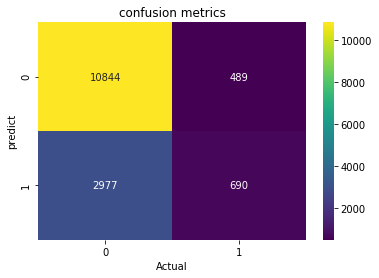

In [43]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(clf_metrics), annot=True, cmap="viridis", fmt="g")
plt.title("confusion metrics")
plt.xlabel("Actual")
plt.ylabel("predict")
plt.show()

In [44]:
print("Accuracy is {}".format(metrics.accuracy_score(Y_test, pred)))
print("Precision is {}".format(metrics.precision_score(Y_test, pred)))
print("Recall is {}".format(metrics.recall_score(Y_test, pred)))

Accuracy is 0.7689333333333334
Precision is 0.5852417302798982
Recall is 0.18816471229888193


In [45]:
# calculate AUC
clf_acu = roc_auc_score(Y_test, probs)

# calculate roc
fpr, tpr, thresholds = roc_curve(Y_test, probs)

In [46]:
print('roc_auc_score for Logistic Regression: ', clf_acu)

roc_auc_score for Logistic Regression:  0.7338305511528183


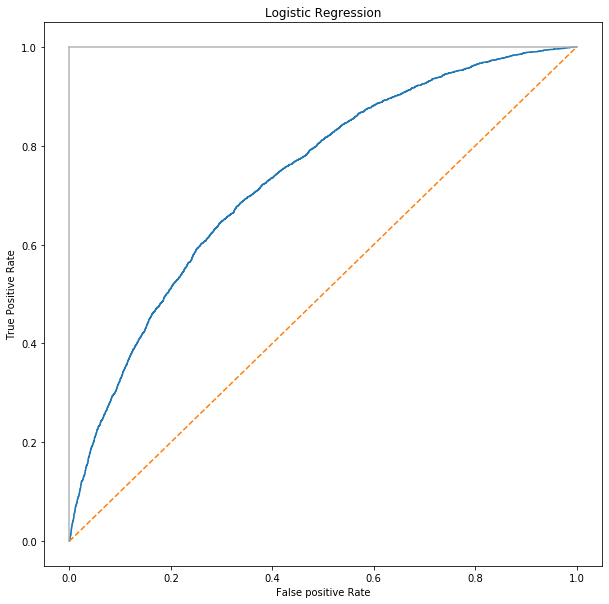

In [47]:
plt.subplots(figsize=(10, 10))
plt.title("Logistic Regression")
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False positive Rate")
plt.show()

# Random Forest

In [48]:
rfc=RandomForestClassifier()

param = {
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 8],
    'criterion' :['gini', 'entropy']
}

rfc = GridSearchCV(rfc, param_grid=param, cv=5)
rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [49]:
print("best parameter is {}".format(rfc.best_params_))
print("accuracy is {}".format(rfc.best_score_))

best parameter is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}
accuracy is 0.7965428571428571


In [50]:
# use best param
best_rfc = RandomForestClassifier(criterion='gini', max_depth=8, max_features="sqrt", n_estimators=500)
best_rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
pred = best_rfc.predict(X_test)
probs = best_rfc.predict_proba(X_test)[:, 1]

In [52]:
rfc_accuracy = metrics.accuracy_score(y_pred=pred, y_true=Y_test)
print(rfc_accuracy)

0.7954666666666667


# Evaluation

In [53]:
rfc_metrics = metrics.confusion_matrix(y_pred=pred, y_true=Y_test)

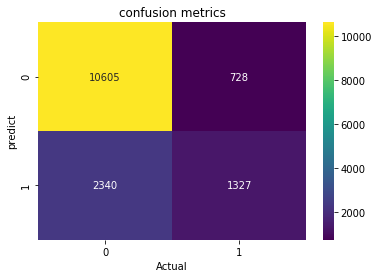

In [54]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(rfc_metrics), annot=True, cmap="viridis", fmt="g")
plt.title("confusion metrics")
plt.xlabel("Actual")
plt.ylabel("predict")
plt.show()

In [55]:
print("Accuracy is {}".format(metrics.accuracy_score(Y_test, pred)))
print("Precision is {}".format(metrics.precision_score(Y_test, pred)))
print("Recall is {}".format(metrics.recall_score(Y_test, pred)))

Accuracy is 0.7954666666666667
Precision is 0.645742092457421
Recall is 0.36187619307335694


In [56]:
 # calculate AUC
rfc_acu = roc_auc_score(Y_test, probs)

# calculate roc
fpr, tpr, thresholds = roc_curve(Y_test, probs)

In [57]:
print('roc_auc_score for Random Forest: ', rfc_acu)

roc_auc_score for Random Forest:  0.8156510771146456


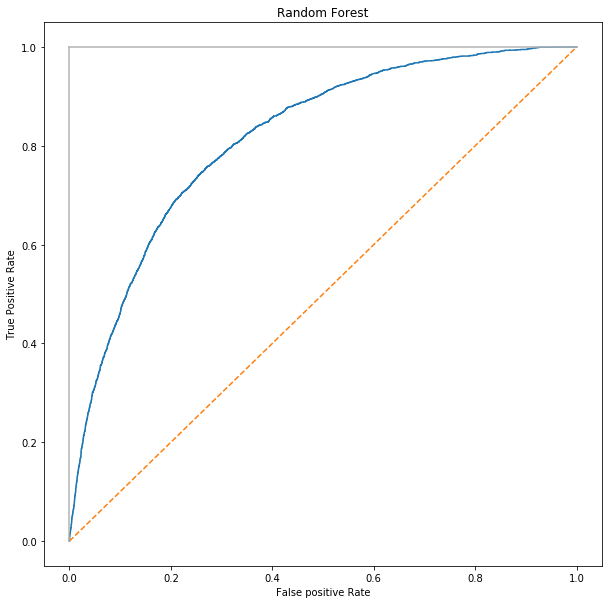

In [58]:
plt.subplots(figsize=(10, 10))
plt.title("Random Forest")
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False positive Rate")
plt.show()

In [59]:
# compare defferent model
result_df = pd.DataFrame({
    "Algorithms": [
                    "Logistic Regression", 
                    "Random Forest"
    ],
    "Accuracy": [
                  clf_accuracy, 
                  rfc_accuracy
      ],
    "Auc score": [
                clf_acu,
                rfc_acu
    ]

    })
result_df.sort_values("Accuracy", ascending=False)

,Algorithms,Accuracy,Auc score
1,Random Forest,0.795467,0.815651
0,Logistic Regression,0.768933,0.733831


Random forest got 79 accuracy and 0.81 auc score. which is paformance is well.
Next step is check which feature is most important for perfome model

In [64]:
pd.DataFrame(best_rfc.feature_importances_, index=X_train.columns, columns=["important"]).sort_values("important", ascending=False)

,important
avg_rating_by_driver,0.194980
surge_pct,0.182154
avg_surge,0.135134
weekday_pct,0.118734
King's Landing,0.069661
trips_in_first_30_days,0.059882
iPhone,0.047540
ultimate_black_user,0.047463
Android,0.044174
avg_dist,0.035104


Important feature is surge_pct which is the percent of trips taken with surge multiplier > 1.
Also rider rate is important for perform model.

Let's check how many active uses are using on weekdays and how rerated avg_rating_by_driver with active user

Text(0, 0.5, 'Frequence')

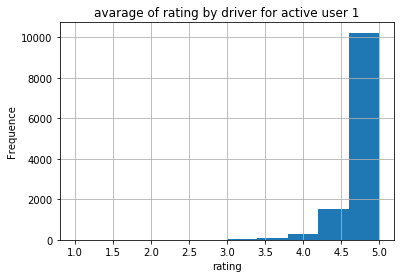

In [95]:
df.loc[df["active_user"] == 1]["avg_rating_by_driver"].hist()
plt.title("avarage of rating by driver for active user 1")
plt.xlabel("rating")
plt.ylabel("Frequence")

Text(0, 0.5, 'Frequence')

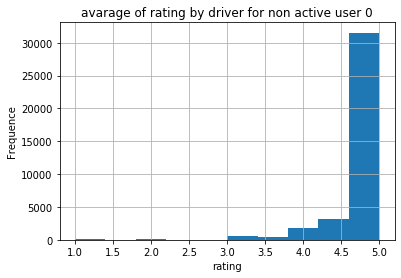

In [96]:
df.loc[df["active_user"] == 0]["avg_rating_by_driver"].hist()
plt.title("avarage of rating by driver for non active user 0")
plt.xlabel("rating")
plt.ylabel("Frequence")

In [93]:
df["weekday_pct"].describe()

count    50000.000000
mean        60.926084
std         37.081503
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

Text(0, 0.5, 'Frequence')

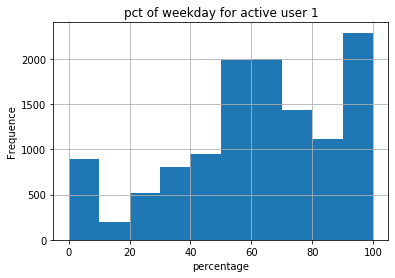

In [92]:
df.loc[df["active_user"] == 1]["weekday_pct"].hist()
plt.title("pct of weekday for active user 1")
plt.xlabel("percentage")
plt.ylabel("Frequence")

Text(0, 0.5, 'Frequence')

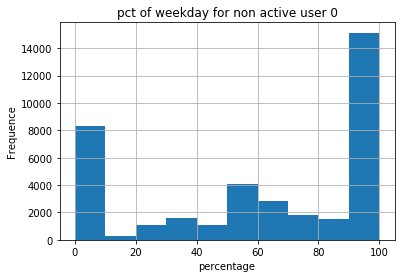

In [88]:
df.loc[df["active_user"] == 0]["weekday_pct"].hist()
plt.title("pct of weekday for non active user 0")
plt.xlabel("percentage")
plt.ylabel("Frequence")

# Conclusion

Active and inactive user are usually use on weekdays there are no big difference between them. 
Surprisingly driver rate was got a high rate by inactive users. In other words, is rate is high user is going to be an inactive user. even if the rate is high there are several reasons to be inactive users. Ultimate must train driver to user will more feel comfortable.